In [1]:
#comment
#observations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("student_performance/data/student.csv")

## Data Profiling

In [7]:
# Checking top 5 rows

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Check shape

data.shape

(1000, 8)

In [9]:
# Segregating Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Checking Datatype

data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
data['gender'].dtypes

dtype('O')

In [13]:
data['gender'].dtypes == 'O'

True

In [14]:
# Checking names of columns

data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
# Making iterable of columns

[feat for feat in data.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [16]:
# Getting only categorical columns

[feat for feat in data.columns if data[feat].dtypes == 'O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
# Getting non categorical columns

[feat for feat in data.columns if data[feat].dtypes != 'O']

['math score', 'reading score', 'writing score']

In [18]:
num_col = [feat for feat in data.columns if data[feat].dtypes != 'O']

cat_col = [feat for feat in data.columns if data[feat].dtypes == 'O']

In [21]:
# Getting only numerical data

data[num_col].head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [22]:
# Getting only categorical data

data[cat_col].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [24]:
# Checking memory usage of data

data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### ***Moving ahead in EDA, now we will checking missing values***

In [26]:
# Finding null values in each column

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing Values in our dataset!

### ***Finding Duplicate values***

In [28]:
data.duplicated().sum()

0

No Duplicate Values in our data!

### ***Finding Unique values***

In [29]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [30]:
# Getting unique values in particular column

data['gender'].unique()

array(['female', 'male'], dtype=object)

# Step 2 :- Statistical Analysis

In [31]:
# Getting basic statistical data

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
# Transposing Data for better visibility.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


last 5 columns are our ***5 Data Summary*** , 75% - 25% gives IQR  and it helps in getting outlier by making boxplot!

In [33]:
# Checking correlation of data

data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


***Conclusion : If we are good reader then we are good writer!***

In [34]:
# Checking covariance

data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [35]:
# Checking skewness of data

data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

***Conclusion : It's Left Skewed since values are negative***

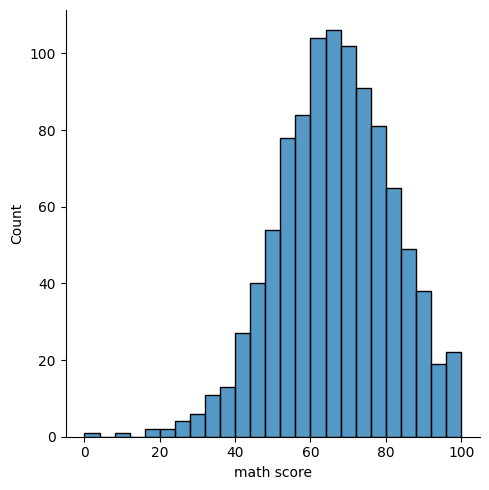

In [36]:
# Plotting skewness using seaborn

sns.displot(data['math score'])

In [44]:
# Getting sum of all subjects

(data['math score'] + data['reading score'] + data['writing score']).head()

0    218
1    247
2    278
3    148
4    229
dtype: int64

In [43]:
# Getting average of subjects

((data['math score'] + data['reading score'] + data['writing score']) / 3).head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
dtype: float64

In [41]:
# Putting the average in a new column

data['average'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

In [42]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [46]:
# Finding mean using groupby

data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [56]:
# Q. Find number of students with less than 30 marks in maths

data.loc[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average                        14
dtype: int64

> ### Performing tests on data

In [58]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

In [59]:
# Assigning numerical columns to a separate df

data_num = data[num_col]

In [60]:
data_num.head(2)

,math score,reading score,writing score
0,72,72,74
1,69,90,88


In [62]:
# Performing normal test funciton

from scipy.stats import normaltest

normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

***Conclusion :- Our p-value is less than 0.05 that means it's non-normally distributed. Not Gaussian.***

- If p>0.05 then data is normally distributed/gaussian.

In [63]:
normaltest(data_num['math score'])[1]*100

0.04508029386993784

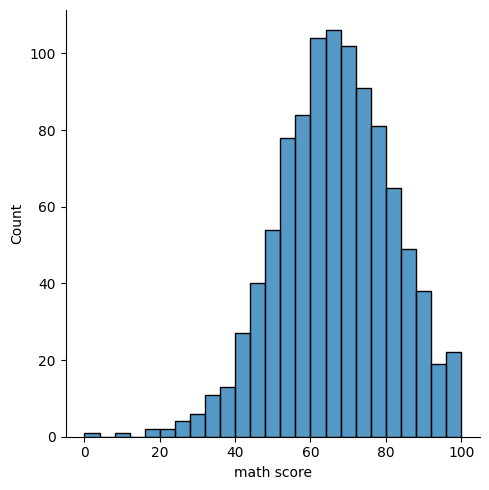

In [64]:
# Checking if our stats is correct using skew graph

sns.displot(data_num['math score'])

> We can make various conclusions using various tests.

### ***Finding the outlier***

<AxesSubplot:>

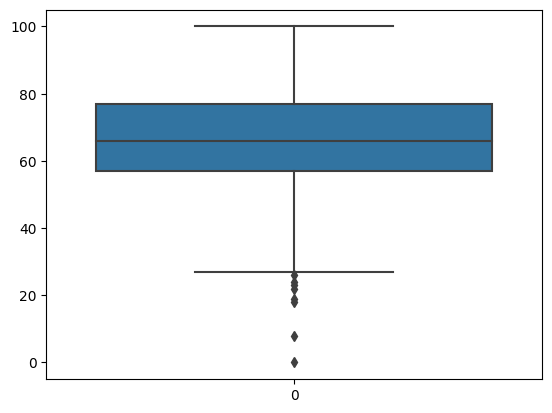

In [66]:
# Plotting boxplot for visual representation

sns.boxplot(data=  data['math score'])

> If we take a look at skew graph of math score then we can figure out that outliers are on left side

<AxesSubplot:>

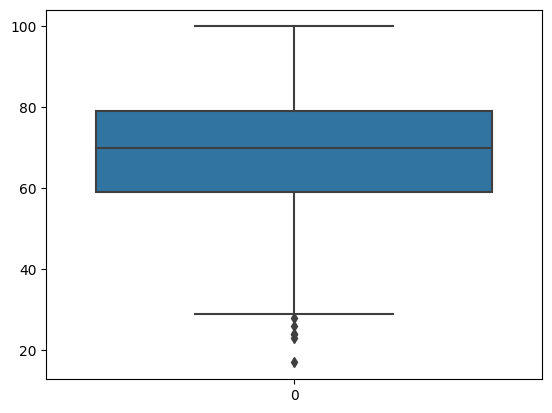

In [70]:
sns.boxplot(data=  data['reading score'])

<AxesSubplot:>

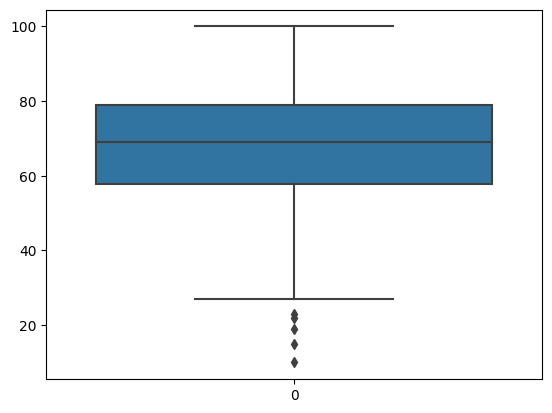

In [69]:
sns.boxplot(data=  data['writing score'])

> ***ANOTHER METHOD for outliers***

In [81]:
q1 = data['math score'].quantile(0.10)       # First Quantile ; Q1 = 47

In [80]:
q3 = data['math score'].quantile(0.90)       # Third Quantile ; Q3 = 86

In [79]:
data['math score'].quantile(1.00)

100.0

In [74]:
data['math score'].max()

100

In [75]:
data['math score'].min()

0

Calculating Upper and lower fence :-

Upper limit -> Q3 + 1.5 x IQR = 86 + 1.5 x 39
Lower Limit -> Q1 - 1.5 x IQR = 47 - 1.5 x 39

In [83]:
IQR = q3 - q1

In [84]:
uper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [86]:
# Now we get a limit in which we can trim the data

print(uper_limit,",", lower_limit)

144.5 , -11.5


In [89]:
data[data['math score'] < lower_limit]      # We got no data since lower limit is negative

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [90]:
data[data['math score']> uper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


***Conclusion:- Our outlier didn't work, we need to adjust the values of q3, q1***

In [116]:
# Adjusting the values of q1 and q3

q1 = data['math score'].quantile(0.25)
q3 = data['math score'].quantile(0.75)

IQR = q3-q1

uper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

# Now we get a limit in which we can trim the data

print(uper_limit,",", lower_limit)

107.0 , 27.0


In [118]:
# These are OUTLIERS!

data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [ ]:
data_outlier = data[data['math score'] < lower_limit]

# data.drop(data_outlier)

> ### ***These outliers will be removed. Can use drop()***

In [96]:
# Creating a function to ease up our work

def outlier_threshold(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return upper_fence, lower_fence

In [110]:
def outlier_thresh(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return upper_fence, lower_fence

In [111]:
for variable in data_num.columns:
    up_lim, low_lim = outlier_thresh(data_num, variable)

In [112]:
low_lim

25.875

In [113]:
up_lim

25.875

# Graph Analysis

In [127]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

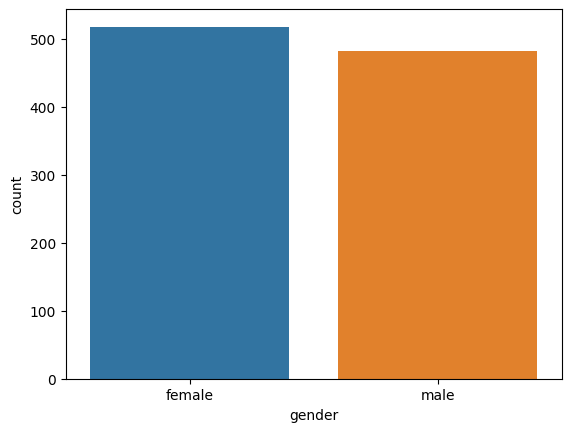

In [129]:
# Counting our variable

sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

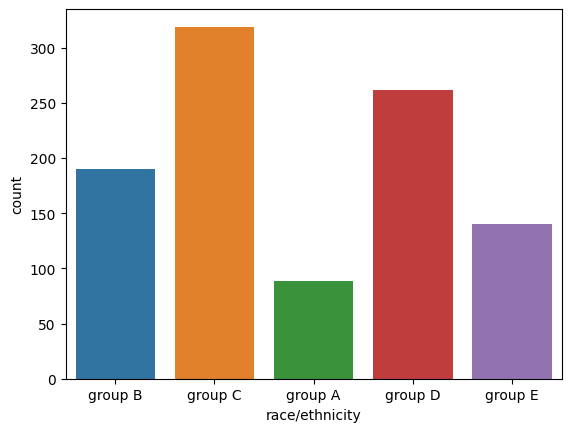

In [130]:
sns.countplot(data['race/ethnicity'])

In [133]:
# Plotting groupby graphs

df_group = data.groupby('gender').mean()

In [137]:
df_group['average'][0]

69.56949806949807

In [138]:
df_group['math score'][0]

63.633204633204635

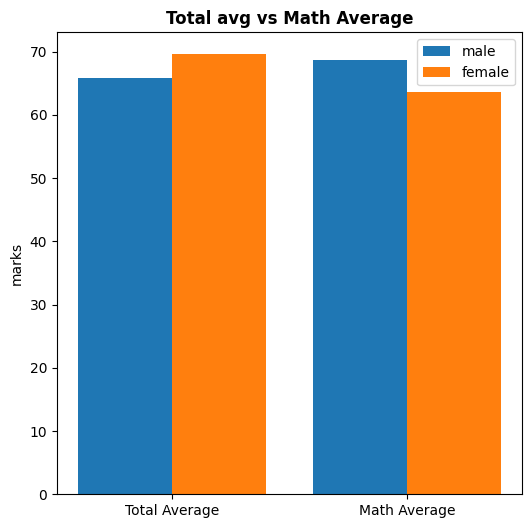

In [142]:
plt.figure(figsize=(6,6))
X = ['Total Average', 'Math Average']
female_score = df_group['average'][0], df_group['math score'][0]
male_score = df_group['average'][1], df_group['math score'][1]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2, male_score, 0.4, label = 'male')
plt.bar(X_axis+0.2, female_score, 0.4, label = 'female')

plt.xticks(X_axis, X)
plt.ylabel('marks')
plt.title('Total avg vs Math Average', fontweight = 'bold')
plt.legend()
plt.show()

In [140]:
female_score

(69.56949806949807, 63.633204633204635)

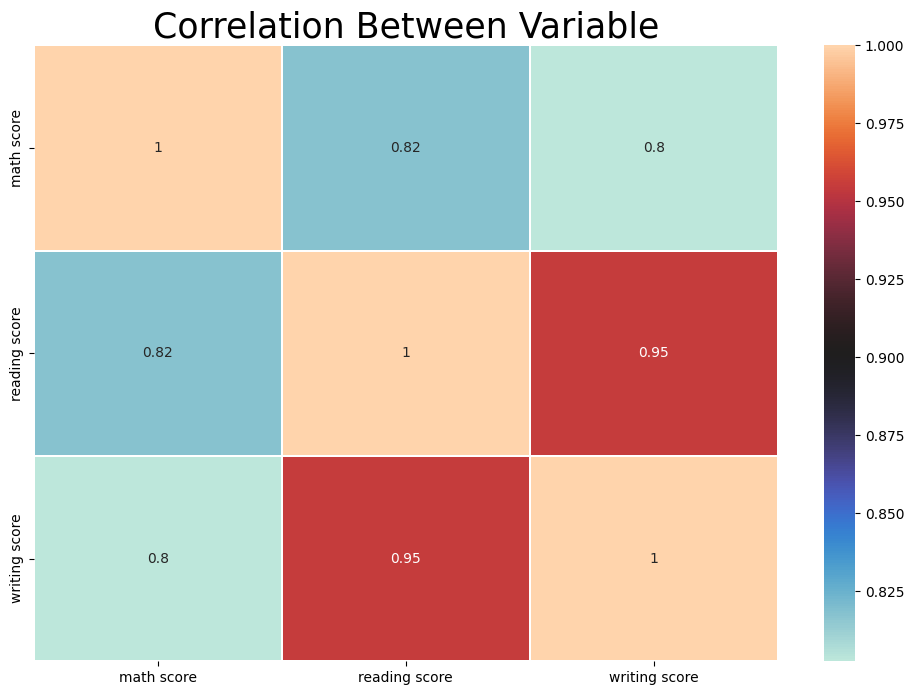

In [160]:
sns.heatmap(data_num.corr(), annot=True, cmap='icefire', linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title("Correlation Between Variable", color='black', size=25)
plt.show()

In [156]:
data_num = data[num_col]

In [158]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


<AxesSubplot:>

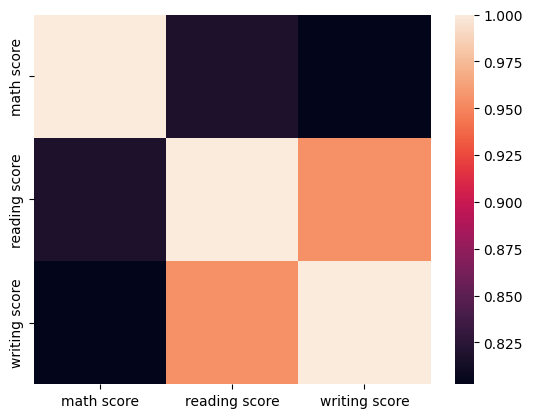

In [159]:
sns.heatmap(data_num.corr())

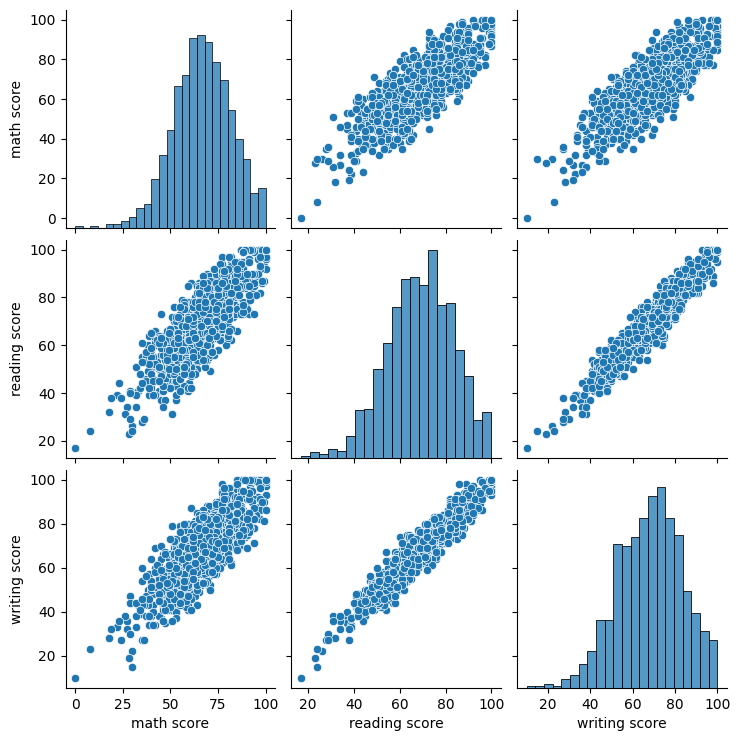

In [161]:
sns.pairplot(data_num)

<AxesSubplot:>

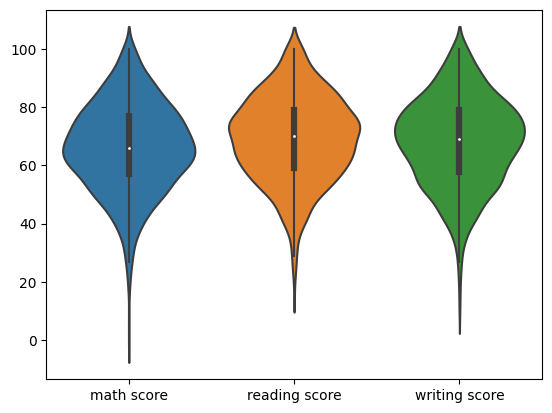

In [165]:
# Violin plot

sns.violinplot(data = data_num)

# We can see the outliers in violin plot